![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# Callysto’s Weekly Data Visualization

## World Teachers' Day

### Recommended Grade levels: 1-6
<br>

### Instructions
#### “Run” the cells to see the graphs
Click “Cell” and select “Run All”.<br> This will import the data and run all the code, so you can see this week's data visualization. Scroll to the top after you’ve run the cells.<br> 

![instructions](https://github.com/callysto/data-viz-of-the-week/blob/main/images/instructions.png?raw=true)

**You don’t need to do any coding to view the visualizations**.
The plots generated in this notebook are interactive. You can hover over and click on elements to see more information. 

Email contact@callysto.ca if you experience issues.

### About this Notebook

Callysto's Weekly Data Visualization is a learning resource that aims to develop data literacy skills. We provide Grades 5-12 teachers and students with a data visualization, like a graph, to interpret. This companion resource walks learners through how the data visualization is created and interpreted by a data scientist. 

The steps of the data analysis process are listed below and applied to each weekly topic.

1. Question - What are we trying to answer? 
2. Gather - Find the data source(s) you will need. 
3. Organize - Arrange the data, so that you can easily explore it. 
4. Explore - Examine the data to look for evidence to answer the question. This includes creating visualizations. 
5. Interpret - Describe what's happening in the data visualization. 
6. Communicate - Explain how the evidence answers the question. 

# Question

<center><img src="img/love_to_learn.jpg" width=500 height=300></center>

<br>**World Teachers' Day** is a day of celebration for all teachers around the globe, returning annaully on **October 5th**. It celebrates the positive impacts teachers have made in transforming education and reflects on the support they provided to their students. More than 100 countries celebrate World Teachers' Day with slight differences on the date. For example, India celerbates World Teachers' Day on September 5th, a month earlier than Canada. 

Since 1996, [Uncesco](https://www.unesco.org/en/days/teachers) designs a campaign for teachers with specialzied themes for every year. This year, the theme is centered around "The teachers we need for the education we want: The global imperative to reverse the teacher shortage", which is aimed to stop an international trend of declining number of teachers. 

### Goal
In this notebook, we want to confirm whether the number of teachers have been reduced in Canada in past 10 years. Then, we will share student survey responses that Callysto personnels have gathered to show our appreication to teachers. More details about the survey responses are listed below.

# Gather

### Code:
The code below will import the Python programming libraries we need to gather and organize the data to answer our question.

In [23]:
# import basic data wrangling libraries
import pandas as pd
import numpy as np

# import NLP data wrangling libraries
import nltk
nltk.download('averaged_perceptron_tagger')
from spellchecker import SpellChecker

# import visualization libraries
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as io
import plotly.graph_objects as go

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jennylee/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Data:
We have two datasets that we will be focusing on this notebook. 

- ##### Statistics Canada
Dataset on the number of educators across Canadian provices is collected from [Statistics Canada website](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3710001001&pickMembers%5B0%5D=2.1&pickMembers%5B1%5D=3.1&pickMembers%5B2%5D=4.1&cubeTimeFrame.startYear=2002+%2F+2003&cubeTimeFrame.endYear=2016+%2F+2017&referencePeriods=20020101%2C20160101). This dataset includes information on the number of full-time and part-time educators across Canadian provinces, with detailed information on their genders and age groups. In our exploration we divided them into three categories: *all-gender*, *females*, and *males*. 

- ##### Callysto Survey on World Teachers' Day
The Callysto Team conducted a brief survey on students who participated in our hackathon. Participants were directed towards a Google Form link where they were asked to answer questions regarding their favorite teachers. We asked the students to keep the name of the teachers to be anonymous, and talk about their favorite teachers' charactersitics that made them their *favourite*. 

### Import the data

##### Statistics Canada

In [6]:
male = pd.read_csv("data/male_teacher_count.csv")
female = pd.read_csv("data/female_teacher_count.csv")
all_genders = pd.read_csv("data/teacher_count.csv")

print("This dataset is derived from Statistics Canada, on the number of full-time & part-time all-gender educators.")
display(male.head())
print("This dataset is derived from Statistics Canada, on the number of full-time & part-time female educators.")
display(female.head())
print("This dataset is derived from Statistics Canada, on the number of full-time & part-time male educators.")
display(all_genders.head())

This dataset is derived from Statistics Canada, on the number of full-time & part-time all-gender educators.


,REF_DATE,GEO,DGUID,Work status,Age group,Sex,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2002/2003,Newfoundland and Labrador,2016A000210,All educators,All ages,Males,Number,223,units,0,v65932897,2.1.1.2,2838.0,NaN,NaN,NaN,0
1,2003/2004,Newfoundland and Labrador,2016A000210,All educators,All ages,Males,Number,223,units,0,v65932897,2.1.1.2,2700.0,NaN,NaN,NaN,0
2,2004/2005,Newfoundland and Labrador,2016A000210,All educators,All ages,Males,Number,223,units,0,v65932897,2.1.1.2,2538.0,NaN,NaN,NaN,0
3,2005/2006,Newfoundland and Labrador,2016A000210,All educators,All ages,Males,Number,223,units,0,v65932897,2.1.1.2,2322.0,NaN,NaN,NaN,0
4,2006/2007,Newfoundland and Labrador,2016A000210,All educators,All ages,Males,Number,223,units,0,v65932897,2.1.1.2,2280.0,NaN,NaN,NaN,0


This dataset is derived from Statistics Canada, on the number of full-time & part-time female educators.


,REF_DATE,GEO,DGUID,Work status,Age group,Sex,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2002/2003,Newfoundland and Labrador,2016A000210,All educators,All ages,Females,Number,223,units,0,v65932898,2.1.1.3,5196.0,NaN,NaN,NaN,0
1,2003/2004,Newfoundland and Labrador,2016A000210,All educators,All ages,Females,Number,223,units,0,v65932898,2.1.1.3,5217.0,NaN,NaN,NaN,0
2,2004/2005,Newfoundland and Labrador,2016A000210,All educators,All ages,Females,Number,223,units,0,v65932898,2.1.1.3,5199.0,NaN,NaN,NaN,0
3,2005/2006,Newfoundland and Labrador,2016A000210,All educators,All ages,Females,Number,223,units,0,v65932898,2.1.1.3,4998.0,NaN,NaN,NaN,0
4,2006/2007,Newfoundland and Labrador,2016A000210,All educators,All ages,Females,Number,223,units,0,v65932898,2.1.1.3,5121.0,NaN,NaN,NaN,0


This dataset is derived from Statistics Canada, on the number of full-time & part-time male educators.


,REF_DATE,GEO,DGUID,Work status,Age group,Sex,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2002/2003,Canada,2016A000011124,All educators,All ages,Both sexes,Number,223,units,0,v65932752,1.1.1.1,350622,NaN,NaN,NaN,0
1,2003/2004,Canada,2016A000011124,All educators,All ages,Both sexes,Number,223,units,0,v65932752,1.1.1.1,352299,NaN,NaN,NaN,0
2,2004/2005,Canada,2016A000011124,All educators,All ages,Both sexes,Number,223,units,0,v65932752,1.1.1.1,356346,NaN,NaN,NaN,0
3,2005/2006,Canada,2016A000011124,All educators,All ages,Both sexes,Number,223,units,0,v65932752,1.1.1.1,362673,NaN,NaN,NaN,0
4,2006/2007,Canada,2016A000011124,All educators,All ages,Both sexes,Number,223,units,0,v65932752,1.1.1.1,378621,NaN,NaN,NaN,0


##### Callysto Stduent Survey
This dataset includes responses to three short answer questions ("What makes your teacher your *favourite?*", "What impact did they have on you?", "What makes them unique?") and one dropdown-list question ("What would you describe your favourite teacher as?") which the students could choose multiple responses as their answers. 

In [8]:
student_df = pd.read_excel("data/Favourite Teacher Student Feedback (Responses).xlsx")
student_df.head()

,Timestamp,What makes your favourite teacher your favourite?,What impact did they have on you?,What makes them unique?,"Out of the following list, what would you describe your favourite teacher as?"
0,2023-08-17 15:43:14.838,He's funny and he marks really softly.,Easy learning,NaN,"compassionate, friendly, humourous, intelligen..."
1,2023-08-17 15:44:33.289,Her classroom is pretty and she teaches well.,"Other than school, they also talked to me abou...",They put more effort in compared to other teac...,"dedicated, inspiring, organized"
2,2023-08-17 15:45:15.110,"-nice, chill, teaches well, no excessive works...",-made me like their subject more,-controlled class at right times but not in a ...,"patient, friendly, humourous, diligent, insigh..."
3,2023-08-17 15:45:31.489,A teacher that makes learning fun and interact...,"They made my year very exciting, and I found m...",They are very open to the struggles of student...,"compassionate, dedicated, inspiring, eager, pa..."
4,2023-08-17 15:45:51.251,They're rational and they don't play favorites...,NaN,They know alot of outdoor education things. I ...,"dedicated, eager, patient, friendly, motivatin..."


### Comment on the data
##### Statistics Canada

In [13]:
print(f"Dataframe size for number of male educators in Canadian provinces: {male.shape[0]} rows and {male.shape[1]} columns.")
print(f"Dataframe size for number of female educators in Canadian provinces: {female.shape[0]} rows and {female.shape[1]} columns.")
print(f"Dataframe size for number of all educators in Canadian provinces: {all_genders.shape[0]} rows and {all_genders.shape[1]} columns.")

Dataframe size for number of male educators in Canadian provinces: 163 rows and 17 columns.
Dataframe size for number of female educators in Canadian provinces: 163 rows and 17 columns.
Dataframe size for number of all educators in Canadian provinces: 210 rows and 17 columns.


#### Callysto Student Survey

In [14]:
print(f"The Callysto Student Survey data consists of {student_df.shape[0]} student responses, answering {student_df.shape[1]-1} questions each.")

The Callysto Student Survey data consists of 75 student responses, answering 4 questions each.


# Organize

The code below will arrange the data cleanly so that we can do analysis on it. This is a quality control step for our data and involves examining the data to detect anything odd with the data (e.g. structure, missing values), fixing the oddities, and checking if the fixes worked. 

#### Statistics Canada

In [18]:
def organize_df(df):
    df["Year"] = df["REF_DATE"].str.split("/").str[-1]
    df["Year"] = pd.DatetimeIndex(df["Year"]).year
    df = df[df["GEO"] != "Canada"]
    return df

all_df = pd.concat([organize_df(all_genders), organize_df(female), organize_df(male)])
all_df.rename(columns={"VALUE": "Count"}, inplace=True)
all_df.head()

,REF_DATE,GEO,DGUID,Work status,Age group,Sex,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,Count,STATUS,SYMBOL,TERMINATED,DECIMALS,Year
15,2002/2003,Newfoundland and Labrador,2016A000210,All educators,All ages,Both sexes,Number,223,units,0,v65932896,2.1.1.1,8034.0,NaN,NaN,NaN,0,2003
16,2003/2004,Newfoundland and Labrador,2016A000210,All educators,All ages,Both sexes,Number,223,units,0,v65932896,2.1.1.1,7920.0,NaN,NaN,NaN,0,2004
17,2004/2005,Newfoundland and Labrador,2016A000210,All educators,All ages,Both sexes,Number,223,units,0,v65932896,2.1.1.1,7737.0,NaN,NaN,NaN,0,2005
18,2005/2006,Newfoundland and Labrador,2016A000210,All educators,All ages,Both sexes,Number,223,units,0,v65932896,2.1.1.1,7320.0,NaN,NaN,NaN,0,2006
19,2006/2007,Newfoundland and Labrador,2016A000210,All educators,All ages,Both sexes,Number,223,units,0,v65932896,2.1.1.1,7401.0,NaN,NaN,NaN,0,2007


#### Callysto Student Survey

In [20]:
columns = ["Timestamp", "Favourite", "Impact", "Unique", "Characteristics"]
student_df.columns = columns

def spell_check(df, col):
    spell_checker = SpellChecker()
    
    for ind, row in df.iterrows():
        df[col] = df[col].astype(str)
        try:
            all_list = row[col].split(" ")
            final_list = []
        
            for word in all_list:
                word = spell_checker.correction(word)
                final_list.append(word)
                df.loc[ind, col] = " ".join(final_list)
        except:
            continue
    return df
    
col_list = student_df.columns[1:-1]

for column in col_list:
    spell_check(student_df, column)
    
student_df.head()

,Timestamp,Favourite,Impact,Unique,Characteristics
0,2023-08-17 15:43:14.838,He's funny and he marks really softly,Easy learning,can,"compassionate, friendly, humourous, intelligen..."
1,2023-08-17 15:44:33.289,Her classroom is pretty and she teaches well i,Other than school they also talked to me about...,They put more effort in compared to other teac...,"dedicated, inspiring, organized"
2,2023-08-17 15:45:15.110,nice chill teaches well no excessive worksheets,made me like their subject more,controlled class at right times but not in a w...,"patient, friendly, humourous, diligent, insigh..."
3,2023-08-17 15:45:31.489,A teacher that makes learning fun and interact...,They made my year very exciting and I found mo...,They are very open to the struggles of student...,"compassionate, dedicated, inspiring, eager, pa..."
4,2023-08-17 15:45:51.251,They're rational and they don't play favorites...,can,They know lot of outdoor education things I al...,"dedicated, eager, patient, friendly, motivatin..."


Using the `spellchecker` library, we replaced potential spelling mistakes with proper words.

# Explore

The code below will be used to help us look for evidence to answer our question. This can involve looking at data in table format, applying math and statistics, and creating different types of visualizations to represent our data.

### Insight into the number of educators across Canadian provinces

In [21]:
colors=['#1f77b4',  # muted blue
        '#ff7f0e',  # safety orange
        '#2ca02c',  # cooked asparagus green
        '#d62728',  # brick red
        '#9467bd',  # muted purple
        '#8c564b',  # chestnut brown
        '#e377c2',  # raspberry yogurt pink
        '#17becf',  # blue-teal
        '#210240',  # dark purple
        '#21DC49',  # bright green
        '#3F5063',  # dark navy
        '#6C7075',  # dark grey
        '#F4BC1A']  # mustard

# Set unique colors for each Canadian provinces.
color_dict = dict(zip(all_df["GEO"].unique(), colors))
all_df["Color"] = all_df["GEO"].map(color_dict)

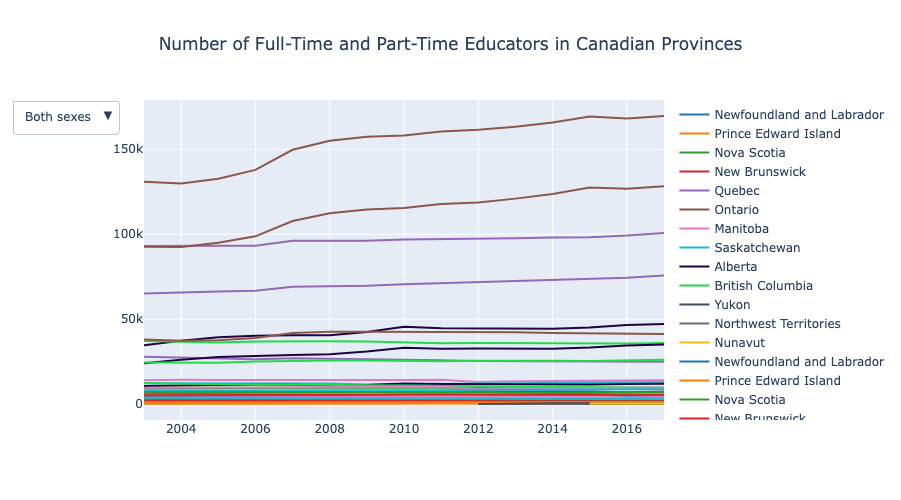

In [42]:
all_fig = go.Figure()
genders = ["Both sexes", "Males", "Females"]

for sex in genders:
    col_num = 0
    df_int = all_df[all_df["Sex"] == sex]
    all_prov = all_df["GEO"].unique()
    for ind, province in enumerate(all_prov):
            all_fig.add_trace(go.Scatter(
                  x = df_int[df_int["GEO"] == province]["Year"],
                  y = df_int[df_int["GEO"] == province]["Count"],
                  mode = "lines",
                  line = dict(color=colors[col_num]),
                  name = province
                  ))
            col_num += 1

all_buttons = []
prov_var_dict = [[] for _ in range(len(genders))]

for ind_sex, sex in enumerate(["Both sexes", "Males", "Females"]):
      df_sex = all_df[all_df["Sex"] == sex]
      all_provs = all_df["GEO"].unique()
      for province in all_provs:
            prov_var_dict[ind_sex].append(province)

currnum = 0

for ind, sex in enumerate(prov_var_dict):
      traces = [False] * len(all_fig.data)
      oldnum = currnum
      num_provs = len(sex)
      traces[0:oldnum] = [False for i in traces[0:oldnum]]
      currnum += num_provs
      traces[oldnum:currnum] = ["legendonly" for i in traces[oldnum:currnum]]
      traces[oldnum] = [True]
      all_buttons.append(dict(
            label=genders[ind],
            method="update",
            args=[{"visible":traces}]
      ))

all_fig.update_layout(
    title={"text":"Number of Full-Time and Part-Time Educators in Canadian Provinces", "x":0.5},
      showlegend=True,
      updatemenus=[dict(
            active=0,
            buttons=all_buttons,
            direction="down"
      )],
    height=500
)

all_fig.show()

The graph above is a little bit difficult to comprehend, and is hard to draw a conclusion on whether the number of total educators are declining. Now, let's the above graph with the [student enrollment data (Statistics Canada)](https://www150.statcan.gc.ca/n1/daily-quotidien/221122/dq221122e-eng.htm) from 2003 to 2017. This data is manually compiled with provincial data retrieved from Statistics Canada. 

Notice that for the comparison below, we are only focusing on **all genders (combining male and females)** to ease our understanding.

In [35]:
student_enrol_df = pd.read_csv("data/enroll_data/all_enrollment.csv")
count_df = all_df[["GEO", "Count", "Year", "Sex"]]
count_df = count_df[count_df["Sex"] == "Both sexes"]
enrol_df = student_enrol_df[["GEO", "VALUE", "Year"]].rename(columns={"VALUE": "Enrollment"})
comb_df = count_df.merge(enrol_df, on=["GEO", "Year"])
comb_df.drop_duplicates(inplace=True)
comb_df["Ratio"] = comb_df["Count"] / comb_df["Enrollment"]
comb_df.head()

,GEO,Count,Year,Sex,Enrollment,Ratio
0,Newfoundland and Labrador,8034.0,2003,Both sexes,84336.0,0.095262
3,Newfoundland and Labrador,7920.0,2004,Both sexes,81510.0,0.097166
6,Newfoundland and Labrador,7737.0,2005,Both sexes,79485.0,0.097339
9,Newfoundland and Labrador,7320.0,2006,Both sexes,76806.0,0.095305
12,Newfoundland and Labrador,7401.0,2007,Both sexes,75177.0,0.098448


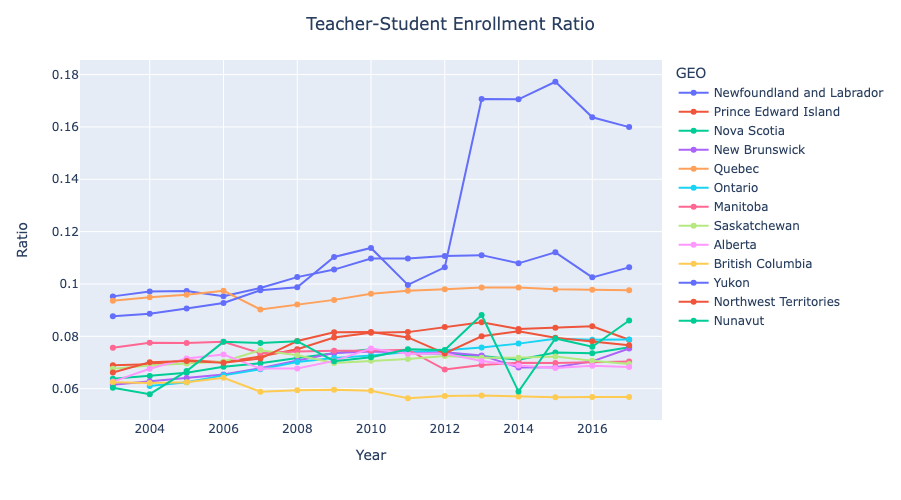

In [41]:
enrollment_fig = px.line(comb_df, x="Year", y="Ratio", markers=True, color="GEO")
enrollment_fig.update_layout(title={"text":"Teacher-Student Enrollment Ratio", "x":0.5},
                            height=500)
enrollment_fig.show()

Overall, we notice that the teacher-student enrollment varies from province to province. From the graph, we can conclude that **Biritish Columbia** experienced the greatest reduction in teacher-student enrollment ratio while **Newfoundland and Labrador** showed the greatest increase. 

### Callysto Student Survey Analysis
#### Bar Graph

In [45]:
def count_values(df, col):
    all_lists = df[col].values
    count = {}
    for ind, item in enumerate(all_lists):
        item_words = item.split(", ")
        for ind_item in item_words:
            if ind_item in list(count.keys()):
                count[ind_item] += 1
            else:
                count[ind_item] = 1
    return count

count_dict = count_values(student_df, "Characteristics")
count_df = pd.DataFrame.from_dict(count_dict, orient="index").reset_index()
count_df.columns = ["Characteristic", "Count"]
count_df = count_df.sort_values(by="Count")
count_df.head()

,Characteristic,Count
23,technological,13
22,meticulous,14
9,diligent,24
15,eager,26
10,insightful,26


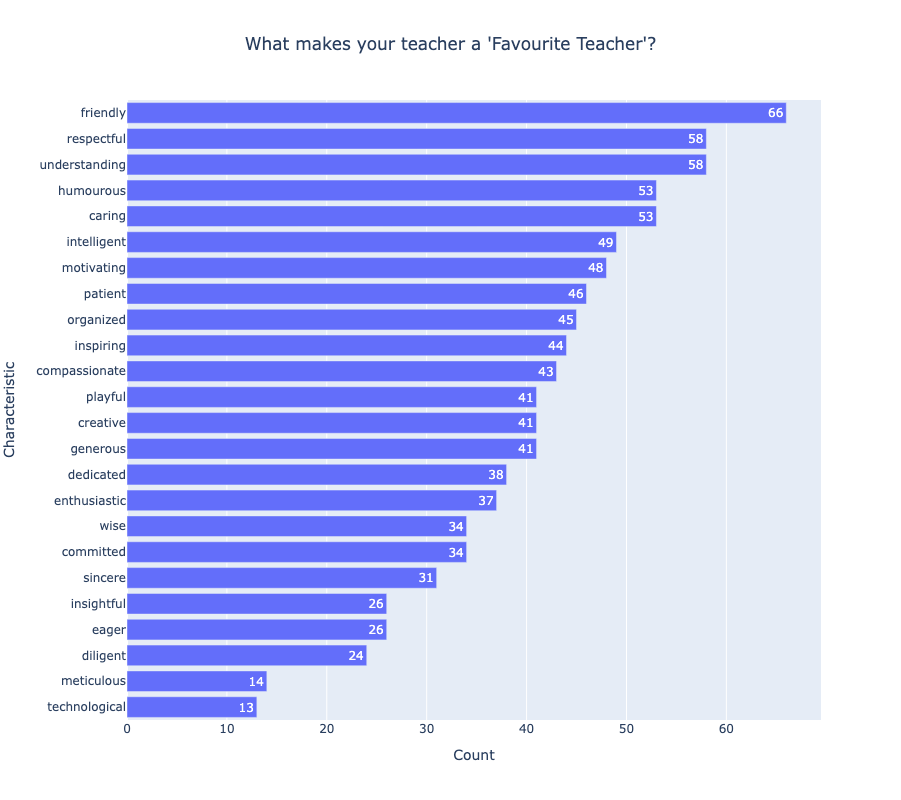

In [63]:
student_bar = px.bar(count_df, x="Count", y="Characteristic", 
                     title="What makes your teacher a 'Favourite Teacher'?", text_auto='.2s')
student_bar.update_layout(width=800, height=800, title=dict(x=0.5))
student_bar.show()

#### WordCloud
Worldcloud images are generated based on student answers to the following questions:
- What makes your favourite teacher *favourite*?
- What *impact* did they have on you?
- What makes them *unique*?

To generate a meaningful wordcloud image, we extracted all **adjectives** from student comments and created our images based on that.

Displaying word cloud for Favourite.


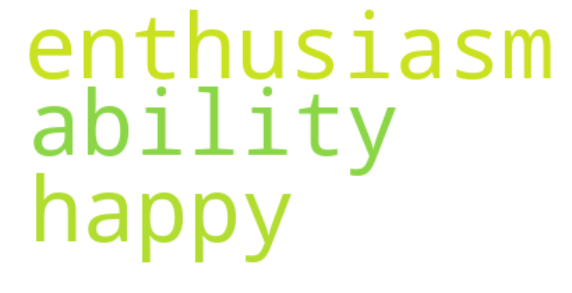

Displaying word cloud for Impact.


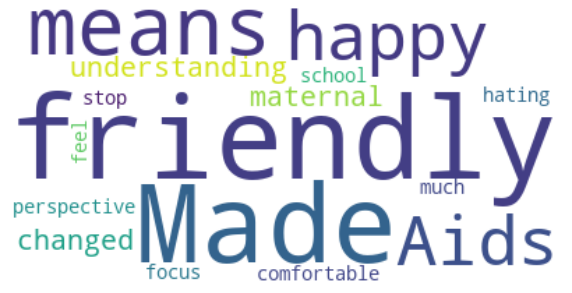

Displaying word cloud for Unique.


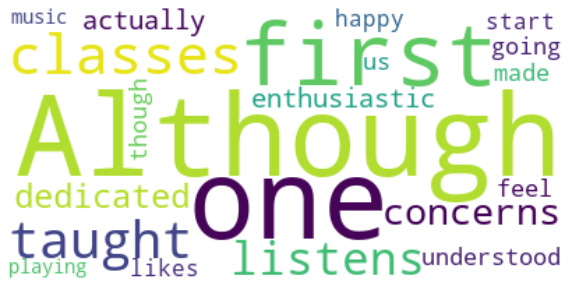

In [65]:
def create_wordcloud(df, col):
    print(f"Displaying word cloud for {col}.")
    all_text =  " ".join(text for text in df[col] if nltk.pos_tag([text])[0][1] == "JJ")
    stopwords = list(STOPWORDS) + ["teacher", "teachers", "students", "make", "class"]
    word_cloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)

    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
for column in col_list:
    create_wordcloud(student_df, column)

# Communicate
Below are some writing prompts to help you reflect on the new information that is presented from the data. When we look at the evidence, think about what you perceive about the information. Is this perception based on what the evidence shows? If others were to view it, what perceptions might they have?

- I used to think ____________________ but now I think ____________________. 
- I wish I knew more about ____________________. 
- This visualization reminds me of ____________________. 
- I really like ____________________.

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)